In [1]:
# Import necessary libraries  
import pandas as pd
#pd.set_option('mode.chained_assignment', None) # for 'SettingWithCopyWarning'
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import pprint as pprint
from random import uniform
from config import api_key
from scipy.stats import linregress
from citipy import citipy
from datetime import datetime


In [3]:
# Create a list of unique city names based on random lat/long coordinates and using the citipy module 
city_list = []
while (len(city_list) < 1000):
    geo_position = (uniform(-90, 90), uniform(-180, 180))
    city = citipy.nearest_city(geo_position[0], geo_position[1]).city_name

    if city not in city_list:
        city_list.append(city)

# Create an empty dataframe to store the weather relevant weather data
city_data = pd.DataFrame(columns={"Name", "Lat", "Long", "Temp", "Humidity", "Cloudiness", "Windspeed",
                                  "Country", "Datetime"})

# Create counters for the record numbers and percentage complete
record=1
percent_done = 0

# Iterate through the city list, calling the api for that city and checking for the data required
for city in city_list:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={api_key}"
    response = requests.get(url).json()
    
    # If the city is present in the database data will be returned and appended to the dataframe
    try:
        new_city = pd.DataFrame({"Name":response['name'], "Lat":response['coord']['lat'], "Long":response['coord']['lon'], 
                                 "Temp":response['main']['temp_max'], "Humidity":response['main']['humidity'],
                                 "Cloudiness":[response['clouds']['all']], "Windspeed":response['wind']['speed'],
                                 "Country":response['sys']['country'], "Datetime":response['dt']})
        
        percent_done = round((record/600*100),0) # target 600 records as testing suggests around 50 cities  
                                                 # not found each run 
        
        print(f"Processing city {record}:  {city.upper()} ................ FOUND, data appended. {percent_done}% complete")
        city_data = city_data.append(new_city)
        
    # If the city is absent an exception is run, and user informed of the missing record    
    except:
        print(f"Processing city {record}:  {city.upper()} ................ CITY NOT FOUND, skipping")
        next
    
    record += 1
    if percent_done > 100:
        break
             
# Rearrange column order and export to csv
city_data = city_data[["Name", "Lat", "Long", "Temp", "Humidity", "Cloudiness", "Windspeed", "Country", "Datetime"]]
city_data.to_csv("../Output/weather_data.csv", index=False)
date_time = datetime.now().strftime('%d-%m-%Y at %H:%M')

# Inform user that data collection is complete and display the df
print("")
print(f"Data retrieval complete. Weather data for {len(city_data)} cities on the {date_time}, is now stored for analysis")
print("Data has been exported to weather_data.csv")
city_data


Processing city 1:  BANAMBA ................ FOUND, data appended. 0.0% complete
Processing city 2:  ANTANIFOTSY ................ FOUND, data appended. 0.0% complete
Processing city 3:  VAINI ................ FOUND, data appended. 0.0% complete
Processing city 4:  PORT ALFRED ................ FOUND, data appended. 1.0% complete
Processing city 5:  DIKSON ................ FOUND, data appended. 1.0% complete
Processing city 6:  BUSSELTON ................ FOUND, data appended. 1.0% complete
Processing city 7:  PASNI ................ FOUND, data appended. 1.0% complete
Processing city 8:  MATAURA ................ FOUND, data appended. 1.0% complete
Processing city 9:  BILMA ................ FOUND, data appended. 2.0% complete
Processing city 10:  TALNAKH ................ FOUND, data appended. 2.0% complete
Processing city 11:  BARROW ................ FOUND, data appended. 2.0% complete
Processing city 12:  PEVEK ................ FOUND, data appended. 2.0% complete
Processing city 13:  TALA

Processing city 100:  NOVICHIKHA ................ FOUND, data appended. 17.0% complete
Processing city 101:  ANJU ................ FOUND, data appended. 17.0% complete
Processing city 102:  KIETA ................ FOUND, data appended. 17.0% complete
Processing city 103:  HASANABAD ................ FOUND, data appended. 17.0% complete
Processing city 104:  BOLONCHEN ................ CITY NOT FOUND, skipping
Processing city 105:  MAREEBA ................ FOUND, data appended. 18.0% complete
Processing city 106:  HERMANUS ................ FOUND, data appended. 18.0% complete
Processing city 107:  SILI ................ FOUND, data appended. 18.0% complete
Processing city 108:  KAWALU ................ FOUND, data appended. 18.0% complete
Processing city 109:  KLOULKLUBED ................ FOUND, data appended. 18.0% complete
Processing city 110:  LITORAL DEL SAN JUAN ................ CITY NOT FOUND, skipping
Processing city 111:  ROMANOVSKAYA ................ FOUND, data appended. 18.0% comp

Processing city 198:  DINGLE ................ FOUND, data appended. 33.0% complete
Processing city 199:  URUMQI ................ FOUND, data appended. 33.0% complete
Processing city 200:  ODWEYNE ................ FOUND, data appended. 33.0% complete
Processing city 201:  SEMYPOLKY ................ FOUND, data appended. 34.0% complete
Processing city 202:  TARKO-SALE ................ FOUND, data appended. 34.0% complete
Processing city 203:  TJOME ................ FOUND, data appended. 34.0% complete
Processing city 204:  ITUNI ................ CITY NOT FOUND, skipping
Processing city 205:  BROOME ................ FOUND, data appended. 34.0% complete
Processing city 206:  ISANGEL ................ FOUND, data appended. 34.0% complete
Processing city 207:  VAO ................ FOUND, data appended. 34.0% complete
Processing city 208:  MANDAN ................ FOUND, data appended. 35.0% complete
Processing city 209:  SAINT GEORGE ................ FOUND, data appended. 35.0% complete
Proces

Processing city 297:  BONGANDANGA ................ FOUND, data appended. 50.0% complete
Processing city 298:  MARIENBURG ................ FOUND, data appended. 50.0% complete
Processing city 299:  NANYAMBA ................ FOUND, data appended. 50.0% complete
Processing city 300:  KANG ................ FOUND, data appended. 50.0% complete
Processing city 301:  PURI ................ FOUND, data appended. 50.0% complete
Processing city 302:  KUNUNURRA ................ FOUND, data appended. 50.0% complete
Processing city 303:  ANCHORAGE ................ FOUND, data appended. 50.0% complete
Processing city 304:  OSSORA ................ FOUND, data appended. 51.0% complete
Processing city 305:  GARISSA ................ FOUND, data appended. 51.0% complete
Processing city 306:  CHAMPERICO ................ FOUND, data appended. 51.0% complete
Processing city 307:  MALOSHUYKA ................ CITY NOT FOUND, skipping
Processing city 308:  NAZE ................ FOUND, data appended. 51.0% compl

Processing city 395:  LABYTNANGI ................ FOUND, data appended. 66.0% complete
Processing city 396:  RESISTENCIA ................ FOUND, data appended. 66.0% complete
Processing city 397:  ANTOFAGASTA ................ FOUND, data appended. 66.0% complete
Processing city 398:  VILA FRANCA DO CAMPO ................ FOUND, data appended. 66.0% complete
Processing city 399:  KARGASOK ................ FOUND, data appended. 66.0% complete
Processing city 400:  MEHAMN ................ FOUND, data appended. 67.0% complete
Processing city 401:  TOBA ................ FOUND, data appended. 67.0% complete
Processing city 402:  KEM ................ FOUND, data appended. 67.0% complete
Processing city 403:  SANTA CRUZ DE LA PALMA ................ FOUND, data appended. 67.0% complete
Processing city 404:  VIDEIRA ................ FOUND, data appended. 67.0% complete
Processing city 405:  RASSVET ................ FOUND, data appended. 68.0% complete
Processing city 406:  OSTROV ...............

Processing city 493:  UTTARKASHI ................ FOUND, data appended. 82.0% complete
Processing city 494:  PIERRE ................ FOUND, data appended. 82.0% complete
Processing city 495:  SALALAH ................ FOUND, data appended. 82.0% complete
Processing city 496:  BITKINE ................ FOUND, data appended. 83.0% complete
Processing city 497:  KETCHIKAN ................ FOUND, data appended. 83.0% complete
Processing city 498:  GREENCASTLE ................ FOUND, data appended. 83.0% complete
Processing city 499:  KARAUL ................ CITY NOT FOUND, skipping
Processing city 500:  HAY RIVER ................ FOUND, data appended. 83.0% complete
Processing city 501:  ACARAU ................ FOUND, data appended. 84.0% complete
Processing city 502:  ZHANGYE ................ FOUND, data appended. 84.0% complete
Processing city 503:  BAYKIT ................ FOUND, data appended. 84.0% complete
Processing city 504:  PORT LINCOLN ................ FOUND, data appended. 84.0% c

Processing city 591:  LAMAR ................ FOUND, data appended. 98.0% complete
Processing city 592:  MAHIBADHOO ................ FOUND, data appended. 99.0% complete
Processing city 593:  HOFN ................ FOUND, data appended. 99.0% complete
Processing city 594:  BUCHANAN ................ FOUND, data appended. 99.0% complete
Processing city 595:  MATARA ................ FOUND, data appended. 99.0% complete
Processing city 596:  PALMER ................ FOUND, data appended. 99.0% complete
Processing city 597:  QUATRE COCOS ................ FOUND, data appended. 100.0% complete
Processing city 598:  SYDNEY MINES ................ FOUND, data appended. 100.0% complete
Processing city 599:  MAROVOAY ................ FOUND, data appended. 100.0% complete
Processing city 600:  KARPOGORY ................ FOUND, data appended. 100.0% complete
Processing city 601:  COIHUECO ................ FOUND, data appended. 100.0% complete
Processing city 602:  UMZIMVUBU ................ CITY NOT FO

,Name,Lat,Long,Temp,Humidity,Cloudiness,Windspeed,Country,Datetime
0,Banamba,13.5500,-7.4500,104.07,15,89,5.61,ML,1619187653
0,Antanifotsy,-19.6500,47.3167,61.79,87,17,5.68,MG,1619187654
0,Vaini,-21.2000,-175.2000,73.40,100,20,1.14,TO,1619187654
0,Port Alfred,-33.5906,26.8910,72.10,69,6,26.44,ZA,1619187654
0,Dikson,73.5069,80.5464,32.36,97,100,19.86,RU,1619187654
...,...,...,...,...,...,...,...,...,...
0,Marovoay,-16.1000,46.6333,89.60,55,20,4.61,MG,1619187796
0,Karpogory,64.0019,44.4451,58.01,45,82,5.84,RU,1619187796
0,Coihueco,-36.6167,-71.8333,53.60,100,90,3.44,CL,1619187796
0,Lander,42.8330,-108.7307,37.00,80,1,8.05,US,1619187797


In [4]:
# DATA CLEANING / SORTING

# Remove any cities with humidity >100%
city_data = city_data[city_data['Humidity'] <= 100]

# Change data type of humidity and cloudiness columns to integer
city_data[['Humidity', 'Cloudiness']] = city_data[['Humidity', 'Cloudiness']].astype(int)

# Create dataframes for the northern and southern hemisphere data
n_hem = city_data[city_data['Lat'] >= 0]
s_hem = city_data[city_data['Lat'] < 0]



### Scatter plots - Temperature (F) vs Latitude (deg)  
  
#### Conclusions  


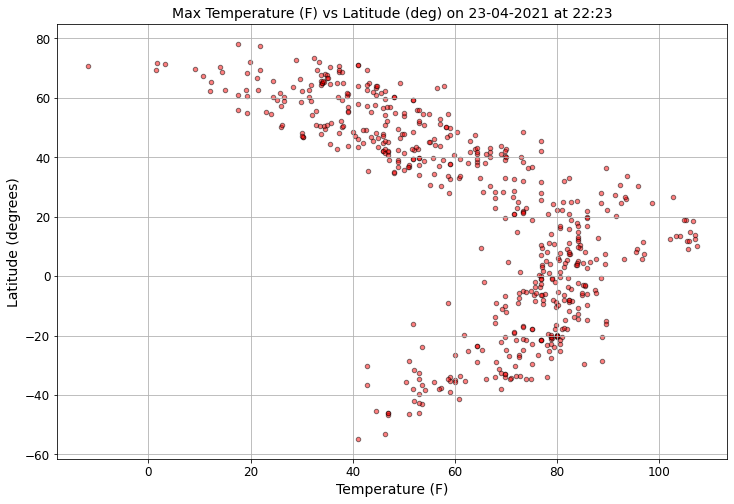

In [5]:
plot_1 = city_data.plot.scatter(x="Temp", y='Lat', color='r', alpha=0.5, figsize=(12,8), edgecolor='black', grid=True)

# Formatting and Display
plt.title(f"Max Temperature (F) vs Latitude (deg) on {date_time}", fontsize=14)
plt.xlabel('Temperature (F)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

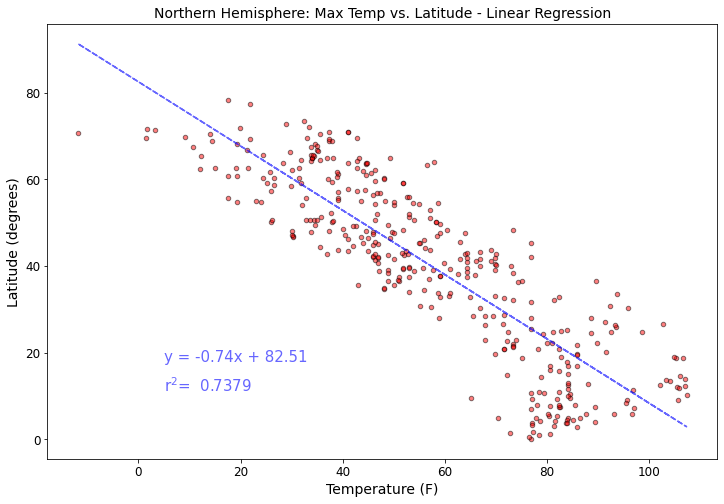

In [6]:
# Perform linear regression
x_values = n_hem['Temp']
y_values = n_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create a df containing the regression values 
reg_y = x_values * slope + intercept
regress_values = pd.DataFrame({"Temp":x_values, "Reg Y": reg_y})

# Create strings for equation and r-squared
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_val =  "r$^{ 2}$=  " + str(round(rvalue**2,4))

# Plot the scatter plot and regression values
plot_1a = n_hem.plot.scatter(x="Temp", y='Lat', color='r', alpha=0.5, figsize=(12,8), edgecolor='black')
regress_values.plot(x="Temp", y='Reg Y', color='b', legend=False, ax=plot_1a, linestyle='--', alpha=0.6)

# Formatting and display
plt.title("Northern Hemisphere: Max Temp vs. Latitude - Linear Regression", fontsize=14 )
plt.xlabel('Temperature (F)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.annotate(line_eq, (5,18), fontsize=15, color="b", alpha=0.6)
plt.annotate(r_val, (5,11), fontsize=15, color="b", alpha=0.6)
plt.show()

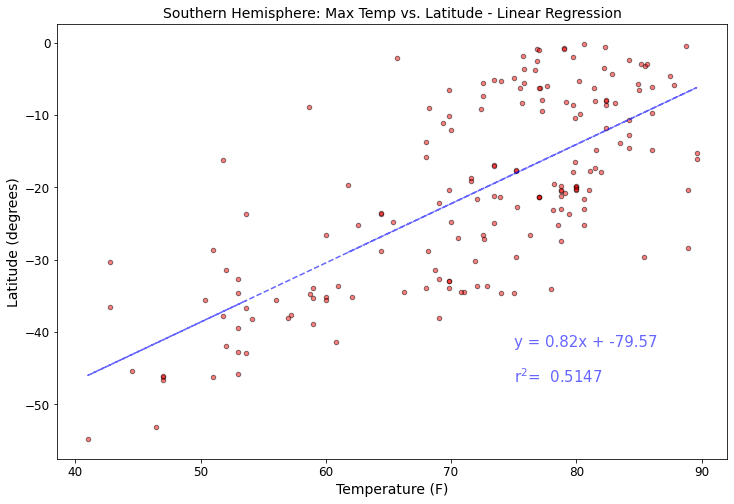

In [7]:
# Perform linear regression
x_values = s_hem['Temp']
y_values = s_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create a df containing the regression values 
reg_y = x_values * slope + intercept
regress_values = pd.DataFrame({"Temp":x_values, "Reg Y": reg_y})

# Create strings for equation and r-squared
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_val =  "r$^{ 2}$=  " + str(round(rvalue**2,4))

# Plot the scatter plot and regression values
plot_1b = s_hem.plot.scatter(x="Temp", y='Lat', color='r', alpha=0.5, figsize=(12,8), edgecolor='black')
regress_values.plot(x="Temp", y='Reg Y', color='b', legend=False, ax=plot_1b, linestyle='--', alpha=0.6)

# Formatting and display
plt.title("Southern Hemisphere: Max Temp vs. Latitude - Linear Regression", fontsize=14 )
plt.xlabel('Temperature (F)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.annotate(line_eq, (75,-42), fontsize=15, color="b", alpha=0.6)
plt.annotate(r_val, (75,-47), fontsize=15, color="b", alpha=0.6)
plt.show()

### Scatter plots - Humidity (%) vs Latitude (deg)

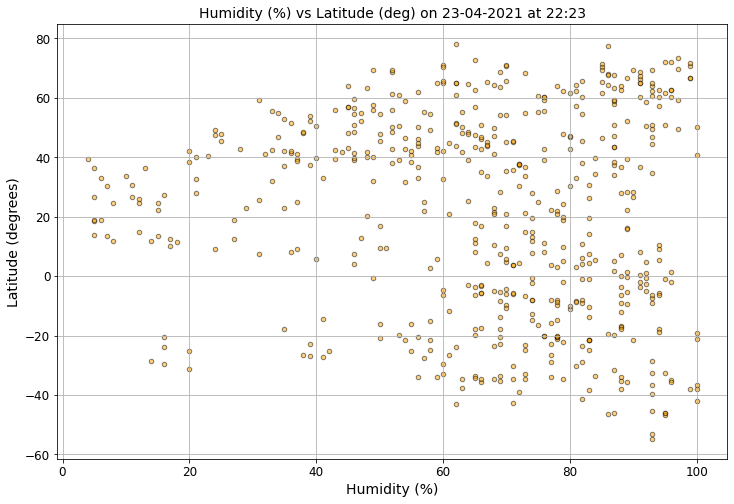

In [8]:
plot_2 = city_data.plot.scatter(x="Humidity", y='Lat', color='orange', alpha=0.5, figsize=(12,8),edgecolor='black', grid=True)

plt.title(f"Humidity (%) vs Latitude (deg) on {date_time}", fontsize=14)
plt.xlabel('Humidity (%)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

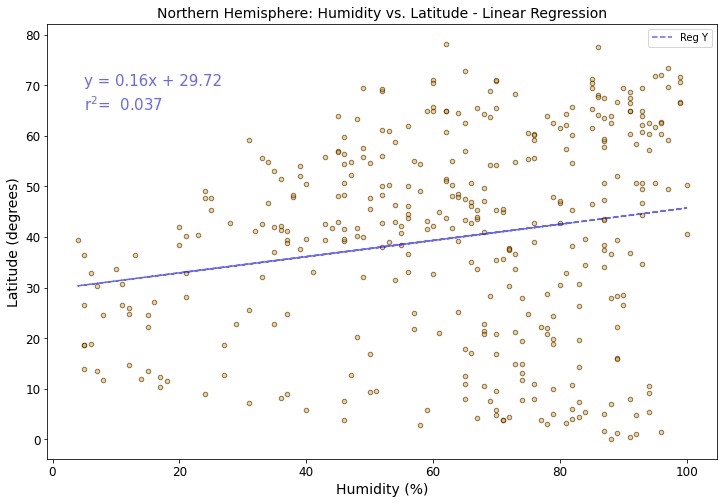

In [9]:
# Perform linear regression
x_values = n_hem['Humidity']
y_values = n_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create a df containing the regression values 
reg_y = x_values * slope + intercept
regress_values = pd.DataFrame({"Humidity":x_values, "Reg Y": reg_y})

# Create strings for equation and r-squared
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_val =  "r$^{ 2}$=  " + str(round(rvalue**2,4))

# Plot the scatter plot and regression values
plot_2a = n_hem.plot.scatter(x="Humidity", y='Lat', color='orange', alpha=0.5,figsize=(12,8), edgecolor='black')
regress_values.plot(x="Humidity", y='Reg Y', color='b', legend=True, ax=plot_2a, linestyle='--', alpha=0.6)

# Formatting and display
plt.title("Northern Hemisphere: Humidity vs. Latitude - Linear Regression", fontsize=14 )
plt.xlabel('Humidity (%)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.legend(loc="best")
plt.yticks(fontsize=12)
plt.annotate(line_eq, (5,70), fontsize=15, color="b", alpha=0.6)
plt.annotate(r_val, (5,65), fontsize=15, color="b", alpha=0.6)

plt.show()

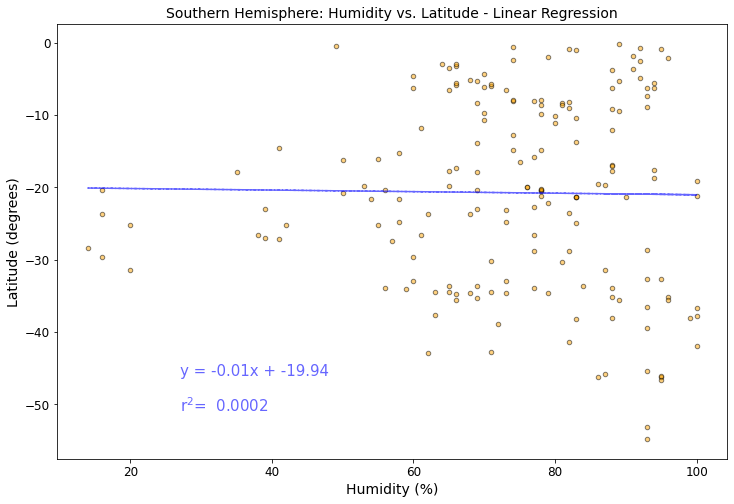

In [10]:
# Perform linear regression
x_values = s_hem['Humidity']
y_values = s_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create a df containing the regression values 
reg_y = x_values * slope + intercept
regress_values = pd.DataFrame({"Humidity":x_values, "Reg Y": reg_y})

# Create strings for equation and r-squared
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_val =  "r$^{ 2}$=  " + str(round(rvalue**2,4))

# Plot the scatter plot and regression values
plot_2b = s_hem.plot.scatter(x="Humidity", y='Lat', color='orange', alpha=0.5,figsize=(12,8), edgecolor='black')
regress_values.plot(x="Humidity", y='Reg Y', color='b', legend=False, ax=plot_2b, linestyle='--', alpha=0.6)

# Formatting and display
plt.title("Southern Hemisphere: Humidity vs. Latitude - Linear Regression", fontsize=14 )
plt.xlabel('Humidity (%)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.annotate(line_eq, (27,-46), fontsize=15, color="b", alpha=0.6)
plt.annotate(r_val, (27,-51), fontsize=15, color="b", alpha=0.6)
plt.show()

### Scatter plots - Cloudiness (%) vs Latitude (deg)

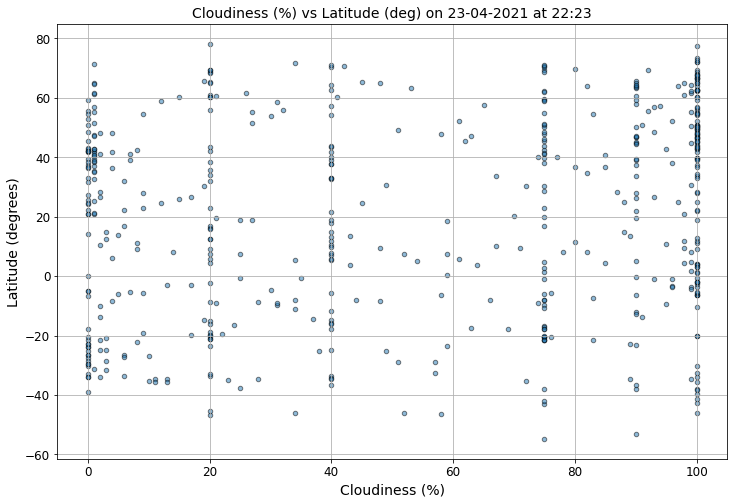

In [11]:
plot_3 = city_data.plot.scatter(x="Cloudiness", y='Lat', alpha=0.5, figsize=(12,8), edgecolor='black', grid=True)

plt.title(f"Cloudiness (%) vs Latitude (deg) on {date_time}", fontsize=14)
plt.xlabel('Cloudiness (%)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

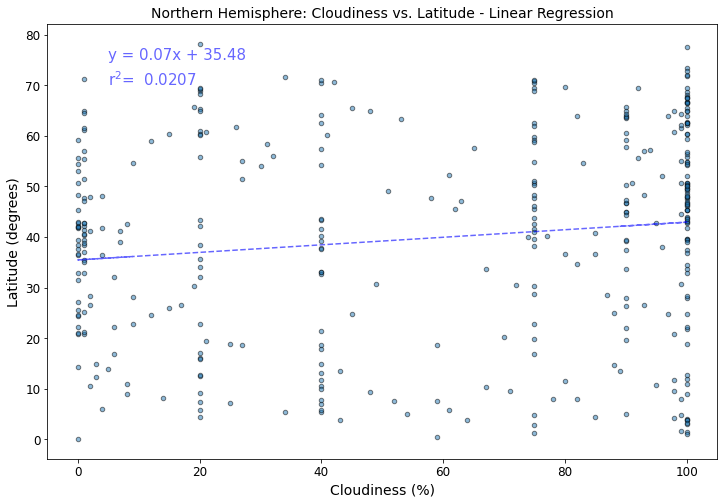

In [12]:
# Perform linear regression
x_values = n_hem['Cloudiness']
y_values = n_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create a df containing the regression values 
reg_y = x_values * slope + intercept
regress_values = pd.DataFrame({"Cloudiness":x_values, "Reg Y": reg_y})

# Create strings for equation and r-squared
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_val =  "r$^{ 2}$=  " + str(round(rvalue**2,4))

# Plot the scatter plot and regression values
plot_3a = n_hem.plot.scatter(x="Cloudiness", y='Lat', alpha=0.5,figsize=(12,8), edgecolor='black')
regress_values.plot(x="Cloudiness", y="Reg Y", color='b', legend=False, ax=plot_3a, linestyle='--', alpha=0.6)

# Formatting and display
plt.title("Northern Hemisphere: Cloudiness vs. Latitude - Linear Regression", fontsize=14 )
plt.xlabel('Cloudiness (%)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.annotate(line_eq, (5,75), fontsize=15, color="b", alpha=0.6)
plt.annotate(r_val, (5,70), fontsize=15, color="b", alpha=0.6)
plt.show()

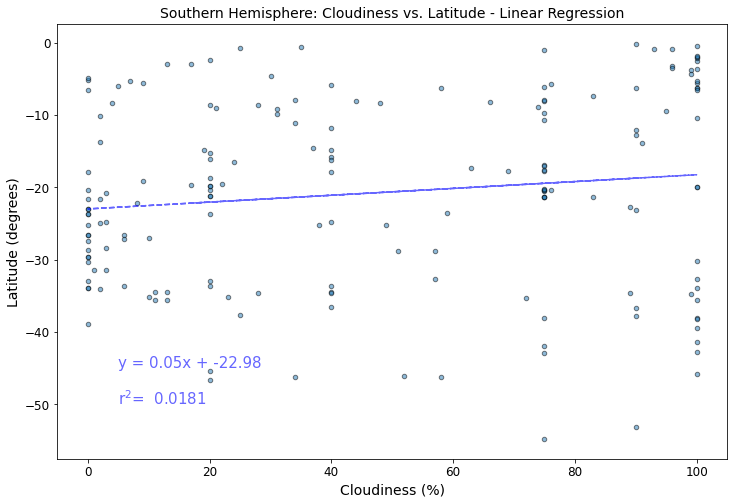

In [13]:
# Perform linear regression
x_values = s_hem['Cloudiness']
y_values = s_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create a df containing the regression values 
reg_y = x_values * slope + intercept
regress_values = pd.DataFrame({"Cloudiness":x_values, "Reg Y": reg_y})

# Create strings for equation and r-squared
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_val =  "r$^{ 2}$=  " + str(round(rvalue**2,4))

# Plot the scatter plot and regression values
plot_3b = s_hem.plot.scatter(x="Cloudiness", y='Lat', alpha=0.5,figsize=(12,8), edgecolor='black')
regress_values.plot(x="Cloudiness", y="Reg Y", color='b', legend=False, ax=plot_3b, linestyle='--', alpha=0.6)

# Formatting and display
plt.title("Southern Hemisphere: Cloudiness vs. Latitude - Linear Regression", fontsize=14 )
plt.xlabel('Cloudiness (%)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.annotate(line_eq, (5,-45), fontsize=15, color="b", alpha=0.6)
plt.annotate(r_val, (5,-50), fontsize=15, color="b", alpha=0.6)
plt.show()

### Scatter plots - Windspeed (mph) vs Latitude (deg)

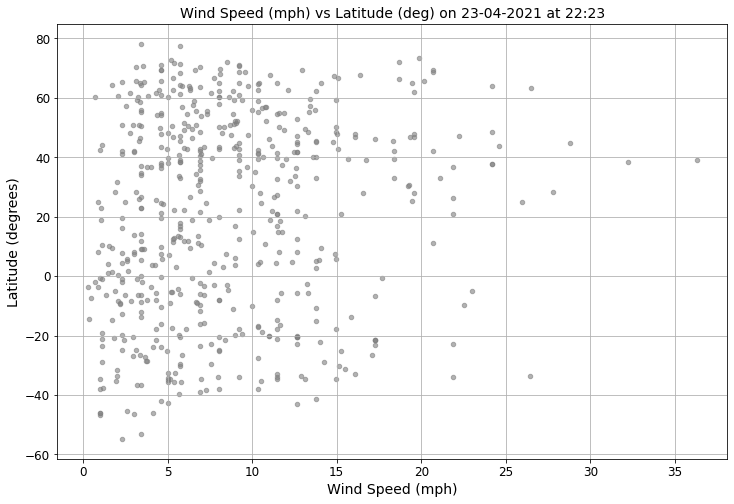

In [14]:
plot_4 = city_data.plot.scatter(x="Windspeed", y='Lat', color='gray', alpha=0.6, figsize=(12,8), grid=True)

plt.title(f"Wind Speed (mph) vs Latitude (deg) on {date_time}", fontsize=14)
plt.xlabel('Wind Speed (mph)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

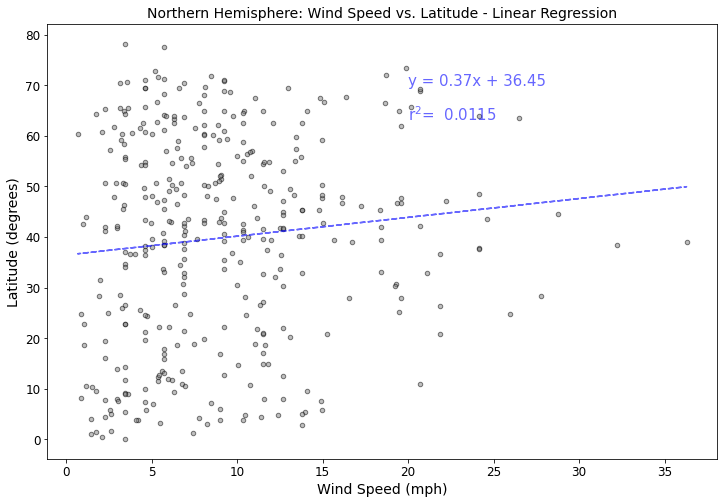

In [15]:
# Perform linear regression
x_values = n_hem['Windspeed']
y_values = n_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create a df containing the regression values 
reg_y = x_values * slope + intercept
regress_values = pd.DataFrame({"Windspeed":x_values, "Reg Y": reg_y})

# Create strings for equation and r-squared
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_val =  "r$^{ 2}$=  " + str(round(rvalue**2,4))

# Plot the scatter plot and regression values
plot_4a = n_hem.plot.scatter(x="Windspeed", y='Lat', color='gray', alpha=0.5,figsize=(12,8), edgecolor='black')
regress_values.plot(x="Windspeed", y="Reg Y", color='b', legend=False, ax=plot_4a, linestyle='--', alpha=0.6)

# Formatting and display
plt.title("Northern Hemisphere: Wind Speed vs. Latitude - Linear Regression", fontsize=14 )
plt.xlabel('Wind Speed (mph)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.annotate(line_eq, (20,70), fontsize=15, color="b", alpha=0.6)
plt.annotate(r_val, (20,63), fontsize=15, color="b", alpha=0.6)
plt.show()

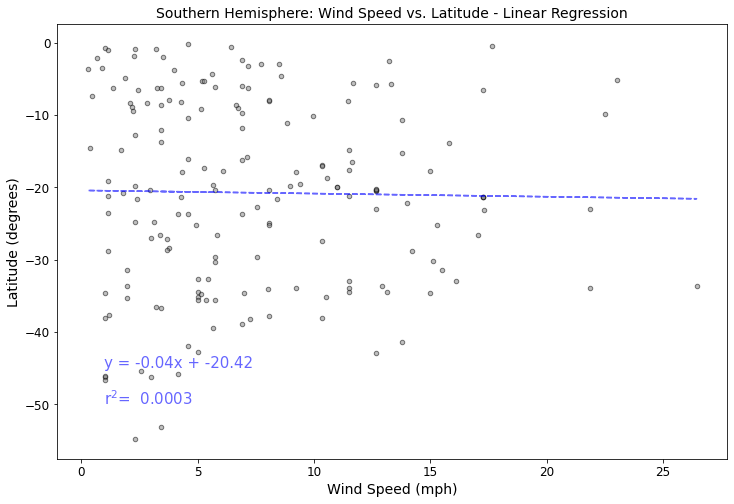

In [16]:
# Perform linear regression
x_values = s_hem['Windspeed']
y_values = s_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create a df containing the regression values 
reg_y = x_values * slope + intercept
regress_values = pd.DataFrame({"Windspeed":x_values, "Reg Y": reg_y})

# Create strings for equation and r-squared
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_val =  "r$^{ 2}$=  " + str(round(rvalue**2,4))

# Plot the scatter plot and regression values
plot_4b = s_hem.plot.scatter(x="Windspeed", y='Lat', color='gray', alpha=0.5,figsize=(12,8),edgecolor='black')
regress_values.plot(x="Windspeed", y="Reg Y", color='b', legend=False, ax=plot_4b, linestyle='--', alpha=0.6)

# Formatting and display
plt.title("Southern Hemisphere: Wind Speed vs. Latitude - Linear Regression", fontsize=14 )
plt.xlabel('Wind Speed (mph)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.annotate(line_eq, (1,-45), fontsize=15, color="b", alpha=0.6)
plt.annotate(r_val, (1,-50), fontsize=15, color="b", alpha=0.6)
plt.show()